Data loading, pre-processing and representation
---



In [2]:
#adding libraries
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
import csv          
import requests     
import numpy as np  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import pandas

In [3]:
my_dataset = pd.read_csv('diabetes.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Datatype matching

In [4]:
# In the dataset there are no categorical feature, therefore, datatypes don't need to be changed
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


###Representing and analysing data about the dataset

In [5]:

print(my_dataset.describe())
print(my_dataset.info()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

You can see above that there are two data objects in the dataset with missing values for the attributes "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g". To obtain the values, we replace the missing values by the mean value of the attribute


###Replacing missing values

In [6]:
#In our dataset neither object misses a feature, so the functions for willing blanks are not needed
#On the other hand there are some outliers which are replaced with the mean values
my_dataset['BloodPressure'].replace(0, my_dataset['BloodPressure'].mean(), inplace=True)
my_dataset['SkinThickness'].replace(0, my_dataset['SkinThickness'].mean(), inplace=True)
my_dataset['BMI'].replace(0, my_dataset['BMI'].mean(), inplace=True)
print(my_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None


C:\Users\zamak\AppData\Local\Temp\ipykernel_16512\1447644165.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_dataset['BloodPressure'].replace(0, my_dataset['BloodPressure'].mean(), inplace=True)
C:\Users\zamak\AppData\Local\Temp\ipykernel_16512\1447644165.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [7]:
#For attributes of categorical type, the values are checked against possible values
print(my_dataset['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [8]:
#Creating a dataset where labels are excluded leaving feature columns only
clustering_dataset = my_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

### Data normalization

In [9]:
#Data normalisation is applied for four attributes to make the data more consistent
my_dataset['Pregnancies'] = (my_dataset['Pregnancies'] - my_dataset['Pregnancies'].min())/(my_dataset['Pregnancies'].max() - my_dataset['Pregnancies'].min())
my_dataset['Glucose'] = (my_dataset['Glucose'] - my_dataset['Glucose'].min())/(my_dataset['Glucose'].max() - my_dataset['Glucose'].min())
my_dataset['BloodPressure'] = (my_dataset['BloodPressure'] - my_dataset['BloodPressure'].min())/(my_dataset['BloodPressure'].max() - my_dataset['BloodPressure'].min())
my_dataset['SkinThickness'] = (my_dataset['SkinThickness'] - my_dataset['SkinThickness'].min())/(my_dataset['SkinThickness'].max() - my_dataset['SkinThickness'].min())
my_dataset['Insulin'] = (my_dataset['Insulin'] - my_dataset['Insulin'].min())/(my_dataset['Insulin'].max() - my_dataset['Insulin'].min())
my_dataset['BMI'] = (my_dataset['BMI'] - my_dataset['BMI'].min())/(my_dataset['BMI'].max() - my_dataset['BMI'].min())
my_dataset['DiabetesPedigreeFunction'] = (my_dataset['DiabetesPedigreeFunction'] - my_dataset['DiabetesPedigreeFunction'].min())/(my_dataset['DiabetesPedigreeFunction'].max() - my_dataset['DiabetesPedigreeFunction'].min())
my_dataset['Age'] = (my_dataset['Age'] - my_dataset['Age'].min())/(my_dataset['Age'].max() - my_dataset['Age'].min())
print(my_dataset.head(10))
print(my_dataset.describe())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.489796       0.304348  0.000000  0.314928   
1     0.058824  0.427136       0.428571       0.239130  0.000000  0.171779   
2     0.470588  0.919598       0.408163       0.147135  0.000000  0.104294   
3     0.058824  0.447236       0.428571       0.173913  0.111111  0.202454   
4     0.000000  0.688442       0.163265       0.304348  0.198582  0.509202   
5     0.294118  0.582915       0.510204       0.147135  0.000000  0.151329   
6     0.176471  0.391960       0.265306       0.271739  0.104019  0.261759   
7     0.588235  0.577889       0.460260       0.147135  0.000000  0.349693   
8     0.117647  0.989950       0.469388       0.413043  0.641844  0.251534   
9     0.470588  0.628141       0.734694       0.147135  0.000000  0.282057   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667      

# Data Visualization

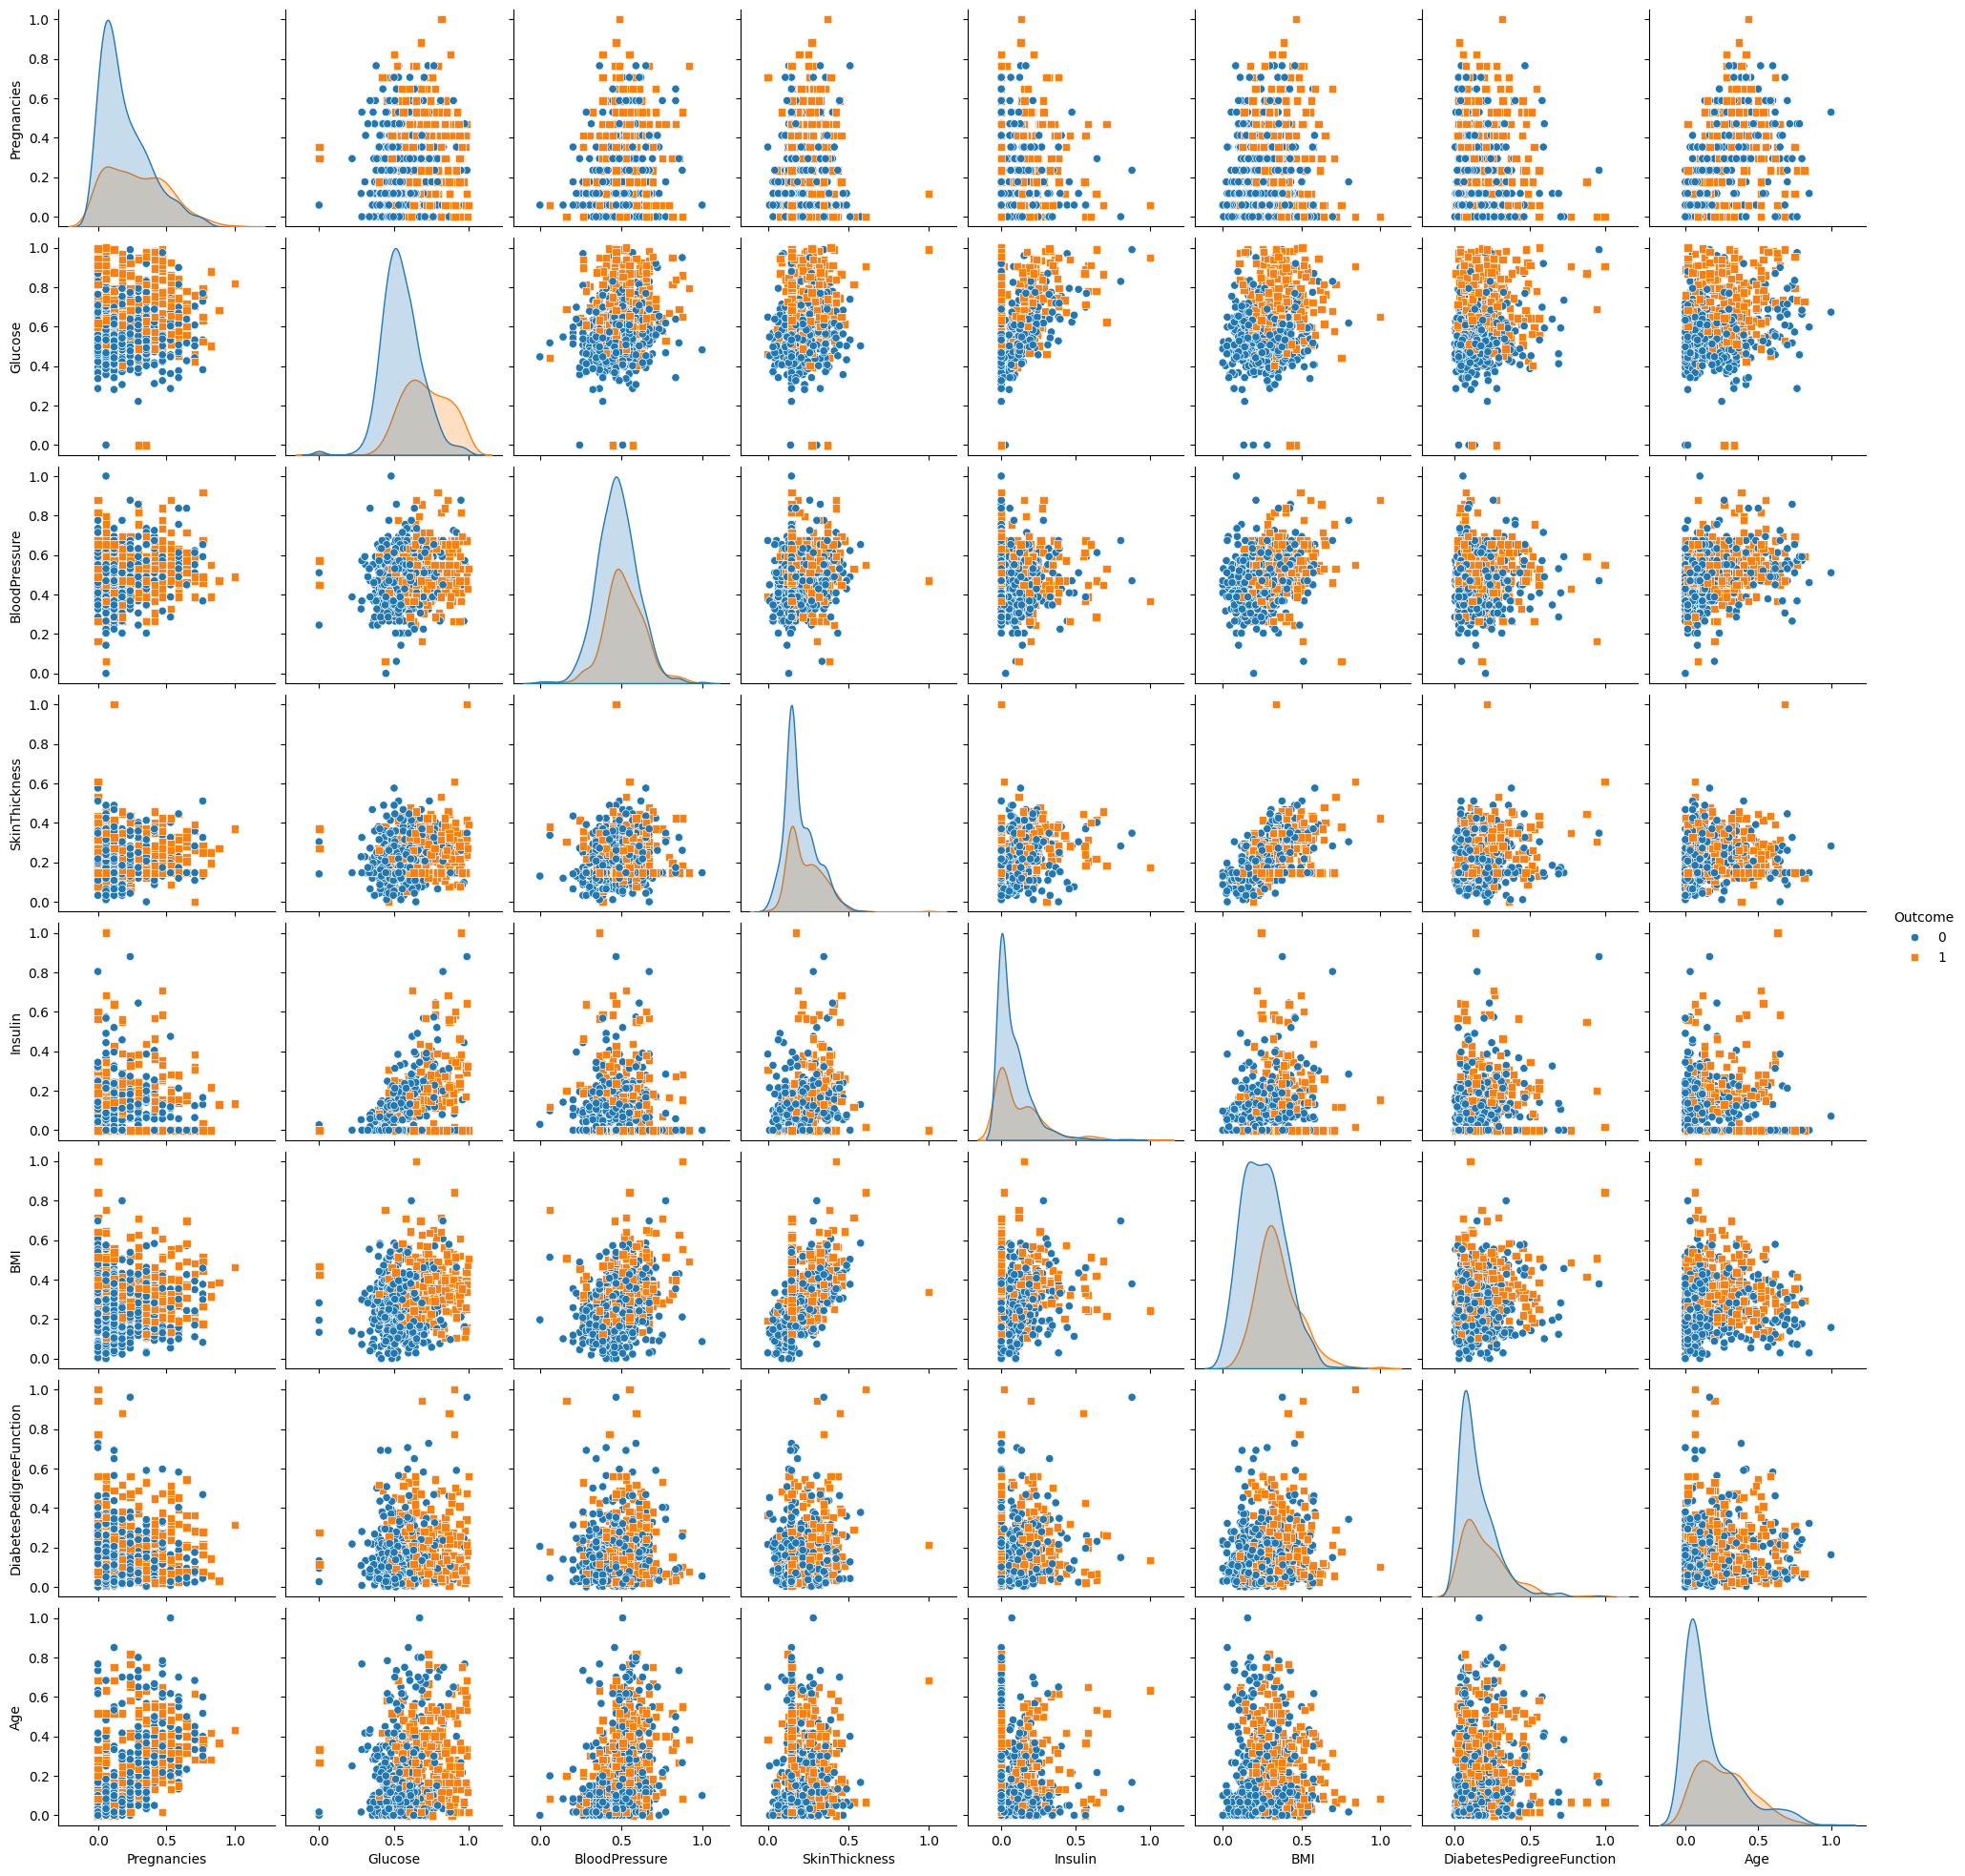

In [10]:
sns.pairplot(my_dataset, hue='Outcome', diag_kind='kde', markers=['o', 's'])
plt.show()

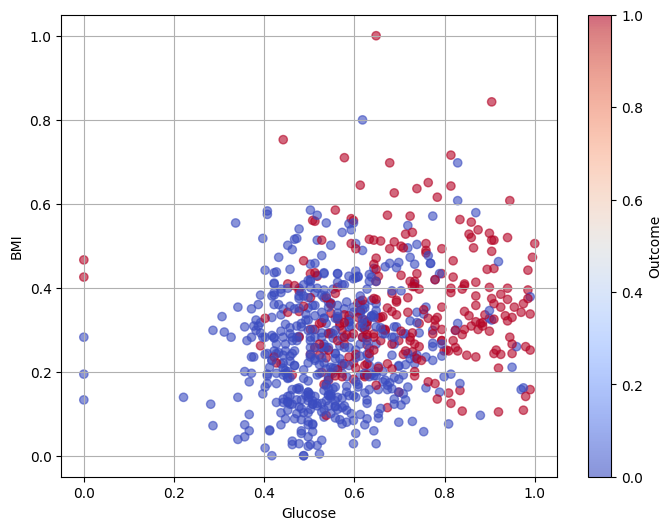

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(my_dataset['Glucose'], my_dataset['BMI'], c=my_dataset['Outcome'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

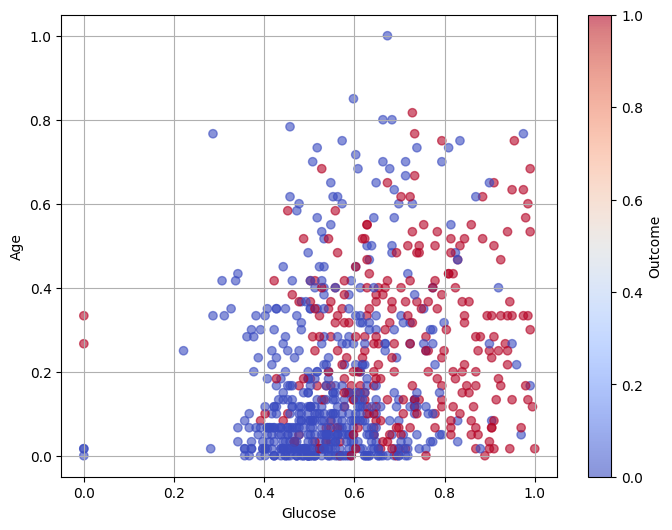

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(my_dataset['Glucose'], my_dataset['Age'], c=my_dataset['Outcome'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

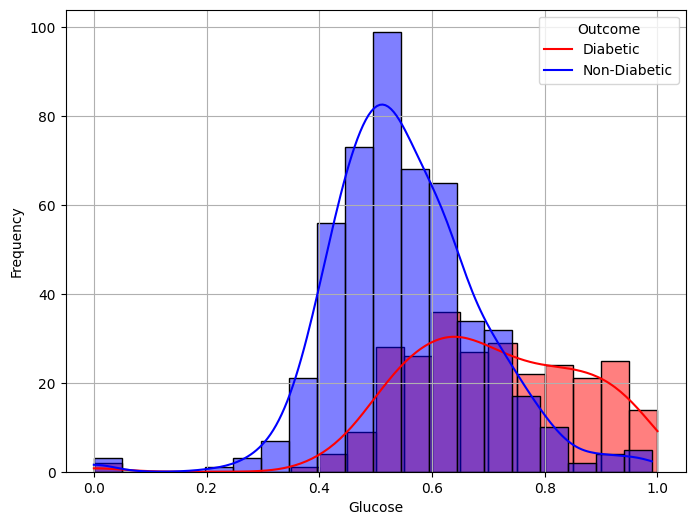

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(my_dataset[my_dataset['Outcome'] == 1]['Glucose'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(my_dataset[my_dataset['Outcome'] == 0]['Glucose'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.grid(True)
plt.show()

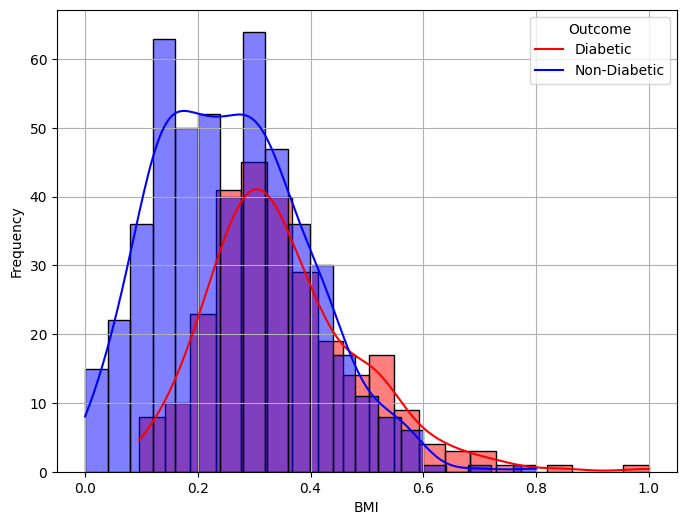

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(my_dataset[my_dataset['Outcome'] == 1]['BMI'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(my_dataset[my_dataset['Outcome'] == 0]['BMI'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.grid(True)
plt.show()

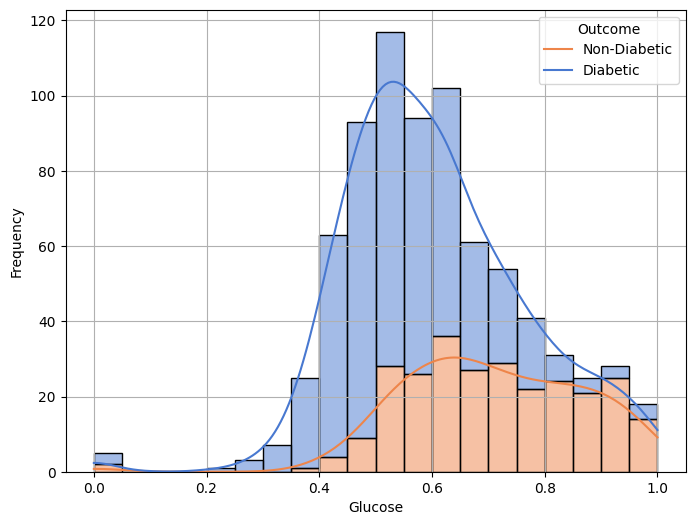

In [15]:
feature1 = 'Glucose'

bins = 20

plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x=feature1, hue='Outcome', kde=True, bins=bins, palette='muted', multiple='stack')
plt.xlabel(feature1)
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

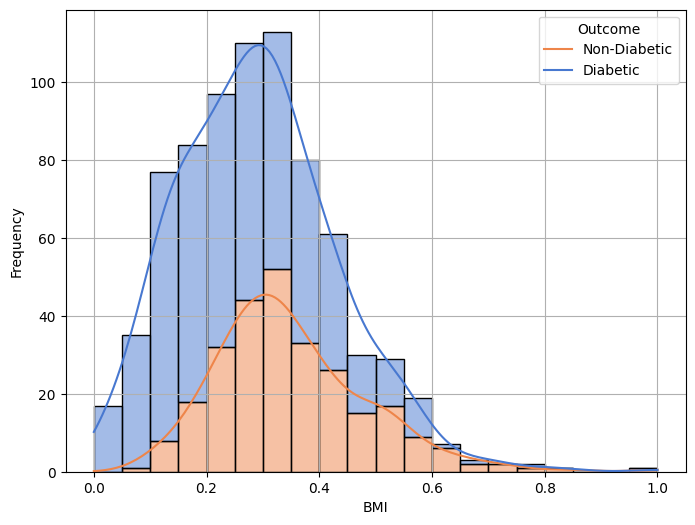

In [16]:
feature2 = 'BMI'

bins = 20

plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x=feature2, hue='Outcome', kde=True, bins=bins, palette='muted', multiple='stack')
plt.xlabel(feature2)
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

In [17]:
glucose_bmi = np.corrcoef(my_dataset['Glucose'], my_dataset['BMI'])[0, 1]
glucose_age = np.corrcoef(my_dataset['Glucose'], my_dataset['Age'])[0, 1]
print("Glucose and BMI correlation:", glucose_bmi)
print("Glucose and Age correlation:", glucose_age)

Glucose and BMI correlation: 0.2188139780359937
Glucose and Age correlation: 0.26351431982433365


In [18]:
features = my_dataset.columns[:-1]
stats_dict = {}
for i in features:
    
    mean_value = np.mean(my_dataset[i])
    median_value = np.median(my_dataset[i])
    std_value = np.std(my_dataset[i])
    stats_dict[i] = {'Mean': mean_value,'Median': median_value,'Standard Deviation': std_value,}

for j, stats in stats_dict.items():
    print(f"Statistical Indicators for '{j}':")
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")
    print()


Statistical Indicators for 'Pregnancies':
Mean: 0.22617953431372548
Median: 0.17647058823529413
Standard Deviation: 0.19808138896523506

Statistical Indicators for 'Glucose':
Mean: 0.6075102072864321
Median: 0.5879396984924623
Standard Deviation: 0.16056178848343078

Statistical Indicators for 'BloodPressure':
Mean: 0.49239598488321107
Median: 0.4897959183673469
Standard Deviation: 0.12355143931203315

Statistical Indicators for 'SkinThickness':
Mean: 0.21311390457521892
Median: 0.17391304347826086
Standard Deviation: 0.10461922097090041

Statistical Indicators for 'Insulin':
Mean: 0.09432562549251379
Median: 0.03605200945626477
Standard Deviation: 0.13613350976911656

Statistical Indicators for 'BMI':
Mean: 0.29142750829112885
Median: 0.28220858895705525
Standard Deviation: 0.1405091185022532

Statistical Indicators for 'DiabetesPedigreeFunction':
Mean: 0.16817946288784516
Median: 0.12574722459436377
Standard Deviation: 0.1413803655117972

Statistical Indicators for 'Age':
Mean: 0.204

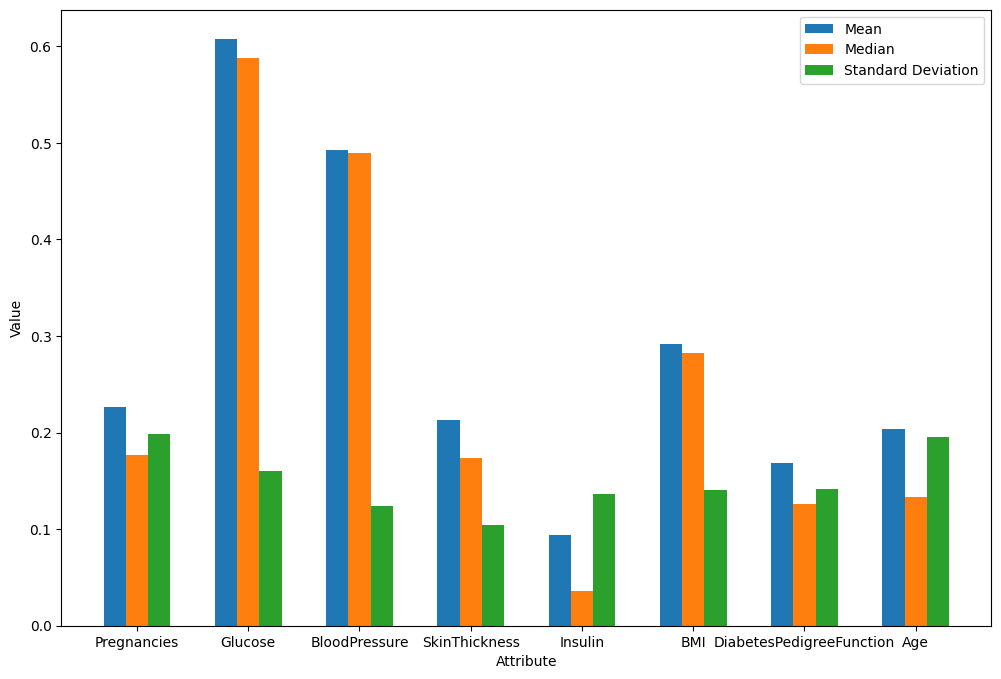

In [19]:

attributes = list(stats_dict.keys())
stats_names = list(stats_dict[attributes[0]].keys())

num_attributes = len(attributes)
num_stats = len(stats_names)

bar_width = 0.2

index = np.arange(num_attributes)

plt.figure(figsize=(12, 8))

for i, stat_name in enumerate(stats_names):
    stat_values = [stats_dict[attr][stat_name] for attr in attributes]
    plt.bar(index + i * bar_width, stat_values, bar_width, label=stat_name)

plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(index + (num_stats - 1) * bar_width / 2, attributes)
plt.legend()
plt.show()

# Artificial Neural Networks

1st model: 2 hidden layers with 32 neurons in each, learning rate is equal to 0.05

In [20]:
# library import for splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# separate target labels from the dataset
targets = my_dataset['Outcome']
# how much percentage of the dataset will be used for training
training_proportion = 0.7
# splitting the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1-training_proportion, random_state=42)
model_1 = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_1.fit(X_train, y_train)

Iteration 1, loss = 0.64469188
Iteration 2, loss = 0.64419943
Iteration 3, loss = 0.64442826
Iteration 4, loss = 0.64315293
Iteration 5, loss = 0.64223207
Iteration 6, loss = 0.64158788
Iteration 7, loss = 0.64094719
Iteration 8, loss = 0.64012104
Iteration 9, loss = 0.63890951
Iteration 10, loss = 0.63985263
Iteration 11, loss = 0.63692830
Iteration 12, loss = 0.63526493
Iteration 13, loss = 0.63425646
Iteration 14, loss = 0.63344874
Iteration 15, loss = 0.63249662
Iteration 16, loss = 0.63086497
Iteration 17, loss = 0.62948230
Iteration 18, loss = 0.62822729
Iteration 19, loss = 0.62663718
Iteration 20, loss = 0.62496594
Iteration 21, loss = 0.62350348
Iteration 22, loss = 0.62121745
Iteration 23, loss = 0.61919802
Iteration 24, loss = 0.61768307
Iteration 25, loss = 0.61396220
Iteration 26, loss = 0.61176434
Iteration 27, loss = 0.61009578
Iteration 28, loss = 0.60824809
Iteration 29, loss = 0.60591485
Iteration 30, loss = 0.60329315
Iteration 31, loss = 0.60031887
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 32),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

####Performance analysis

In [21]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
y_predictions_1 = model.predict(X_test)
print(classification_report(y_test, y_predictions_1, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_1)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

NameError: name 'model' is not defined

#### The confusion matrix shows that 46 data objects with label 1 was mistakenly classified as 0, and 21 data objects with label 1 was classified as 0. In total: 67 out of 231 data objects were misclassified: overall accuracy 71%. 

2nd model: hidden layers sizes are icreased up to 86 neurons each

In [ ]:
model_2 = MLPClassifier(hidden_layer_sizes=(86,86), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_2.fit(X_train, y_train)

In [ ]:
y_predictions_2 = model_2.predict(X_test)
print(classification_report(y_test, y_predictions_2, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_2)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

#### The accuracy of the second model is only 68%: this model overfits the training data due to the too large number of neurons

3rd model: one hidden layer with 64 neurons, learning rate is 0.01

In [ ]:
model_3 = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.1, verbose=1)
model_3.fit(X_train, y_train)

In [ ]:
y_predictions_3 = model_3.predict(X_test)
print(classification_report(y_test, y_predictions_3, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_3)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is only 65%: learning rate is too high in this model

model 4: one hidden layer with 32 neurons, learning rate is 0.02

In [ ]:
model_4 = MLPClassifier(hidden_layer_sizes=(32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.02, verbose=1)
model_4.fit(X_train, y_train)

In [ ]:
y_predictions_4 = model_4.predict(X_test)
print(classification_report(y_test, y_predictions_4, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_4)
print(conf_matrix)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is 70%, it performed slightly worse then the first one. Therefore, after conducted experiments the first model is declared as the most accurate and reliable model out of 4 models tested. 